In [34]:
import tensorflow as tf
from tensorflow import keras

In [35]:
print(tf.__version__)

2.1.0


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
mnist=keras.datasets.fashion_mnist

In [38]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [39]:
class_names=['top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']


In [40]:
X_train,X_test=X_train/255.0,X_test/255.0

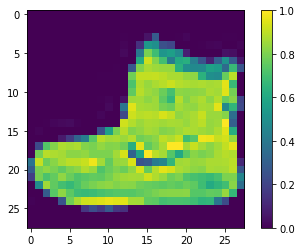

In [41]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()

In [42]:
##Building a model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

model=Sequential()
model.add(Flatten(input_shape=(28,28))) #transforms the matrix into  a 1d array
model.add(Dense(128,activation='relu'))#All these layers include the bias 
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [43]:
##Additional Shit: Loss-Function,Optimizer,Metrics
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=5,batch_size=10,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 51s 1ms/sample - loss: 0.4983 - accuracy: 0.8196 - val_loss: 0.4041 - val_accuracy: 0.8565
Epoch 2/5
48000/48000 [==============================] - 49s 1ms/sample - loss: 0.3784 - accuracy: 0.8602 - val_loss: 0.3587 - val_accuracy: 0.8701
Epoch 3/5
48000/48000 [==============================] - 50s 1ms/sample - loss: 0.3424 - accuracy: 0.8735 - val_loss: 0.3551 - val_accuracy: 0.8713
Epoch 4/5
48000/48000 [==============================] - 50s 1ms/sample - loss: 0.3150 - accuracy: 0.8839 - val_loss: 0.3762 - val_accuracy: 0.8626
Epoch 5/5
48000/48000 [==============================] - 52s 1ms/sample - loss: 0.2983 - accuracy: 0.8885 - val_loss: 0.3646 - val_accuracy: 0.8716


In [ ]:
test_loss,test_acc=model.evaluate(X_test,y_test)
print(test_acc)

In [45]:
help(model)

Help on Sequential in module tensorflow.python.keras.engine.sequential object:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Sequential(layers=None, name=None)
 |  
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dens

In [46]:
history.history

{'loss': [0.498265234651238,
  0.3783557947158503,
  0.3424484038991068,
  0.31496606855614423,
  0.2983261322371618],
 'accuracy': [0.819625, 0.86020833, 0.8735, 0.8839167, 0.8885],
 'val_loss': [0.40407340179973594,
  0.3586993795214221,
  0.3551364528416889,
  0.3761695256324795,
  0.3646473458766316],
 'val_accuracy': [0.8565, 0.87008333, 0.87133336, 0.86258334, 0.87158334]}

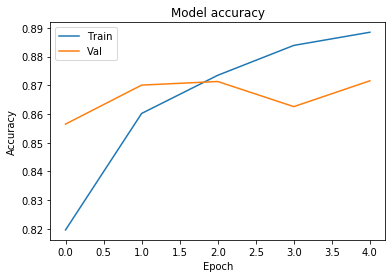

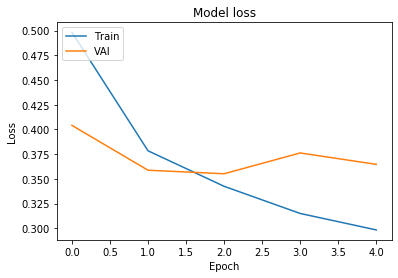

In [48]:
#Plot training and valildation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()
#Plot training and valildation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','VAl'],loc='upper left')

plt.show()

In [30]:
y_pred=model.predict_classes(X_test)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_test,y_pred)

0.8672

In [50]:
!pip install mlxtend

     |████████████████████████████████| 1.3 MB 2.6 MB/s eta 0:00:01


In [59]:
#Plot confusion Matrix

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f665ffda4d0>)

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


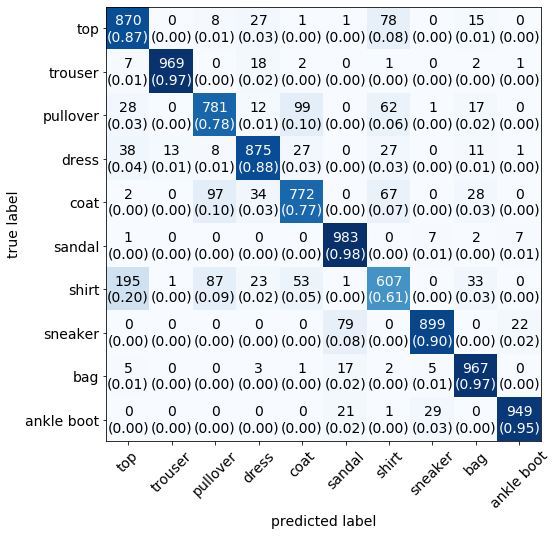

In [60]:
font={
    'family':'Helvetica',
    'size':14
}

matplotlib.rc('font',**font)
mat=confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=mat,figsize=(8,8),class_names=class_names,show_normed=True)